Data Exploration and Analysis | DSC-530 T301 <br>
Jeremy Barton <br>
07.04.2025

<b>Appendix</b>

[Introduction](#introduction)

[Data Preparation](#data-preparation)

## Introduction

### Data Preparation

Checking the shape of this dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in fibromyalgia questionaire data
response_data = pd.read_csv('data/responses.csv')

# Create CSI dataset from fibro_dataset.csv
csi_responses = response_data[['ID','group','sex','age','SES','CSI1','CSI2','CSI3','CSI4','CSI5','CSI6','CSI7','CSI8','CSI9','CSI10','CSI11','CSI12','CSI13','CSI14','CSI15','CSI16','CSI17','CSI18','CSI19','CSI20','CSI21','CSI22','CSI23','CSI24','CSI25']]
csi_responses

,ID,group,sex,age,SES,CSI1,CSI2,CSI3,CSI4,CSI5,...,CSI16,CSI17,CSI18,CSI19,CSI20,CSI21,CSI22,CSI23,CSI24,CSI25
0,1,0,1,64,6,1,2,0,1,1,...,1,0,2,0,0,0,0,1,0,0
1,2,0,1,22,6,3,2,2,0,1,...,2,2,1,0,0,2,0,1,1,0
2,3,0,1,54,5,2,2,2,2,1,...,1,2,1,1,0,0,1,1,0,1
3,4,0,1,23,6,3,2,3,2,1,...,2,2,1,0,1,1,0,2,2,0
4,5,0,1,22,7,3,2,0,0,1,...,2,2,1,0,1,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,395,1,1,27,1,4,4,3,3,2,...,4,4,4,3,4,4,4,4,4,3
395,396,1,1,47,7,4,3,3,2,3,...,4,4,3,2,2,2,3,4,1,4
396,397,1,1,30,5,4,4,3,3,3,...,3,4,4,4,3,2,4,4,2,4
397,398,1,1,49,5,3,4,1,0,3,...,2,3,4,2,0,1,3,4,0,3


Assessing the Central Sensitization Inventory answers.

In [3]:
csi_questions = pd.read_csv('data/csi/csi_questions.csv')
spsq_questions = pd.read_csv('data/spsq/spsq_questions.csv')

csi_keys = pd.read_csv('data/csi/csi_keys.csv')
spsq_keys = pd.read_csv('data/spsq/spsq_keys.csv')

#csi_cat = list(csi_keys['option'])
# spsq_cat = list(spsq_keys['option'])
# spsq_cat

Pivot response dataset into new table with questions as fields and averages from each as values. Group by `group`.

In [4]:
categories = csi_keys['option'].tolist()
categories

['Never', 'Rarely', 'Sometimes', 'Often', 'Always']

This tells us the average response per question by control or experimental group.

Now let's show what percentage of female experimental responses experience jaw pain 

In [ ]:
never_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1) &
    (csi_responses['CSI20'] == 0)
]

rarely_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1) &
    (csi_responses['CSI20'] == 1)
]

sometimes_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1) &
    (csi_responses['CSI20'] == 2)
]

often_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1) &
    (csi_responses['CSI20'] == 3)
]

always_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1) &
    (csi_responses['CSI20'] == 4)
]

all_fibro = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 1)
]

counts = [
    never_pain['ID'].count(),
    rarely_pain['ID'].count(),
    sometimes_pain['ID'].count(),
    often_pain['ID'].count(),
    always_pain['ID'].count()
]


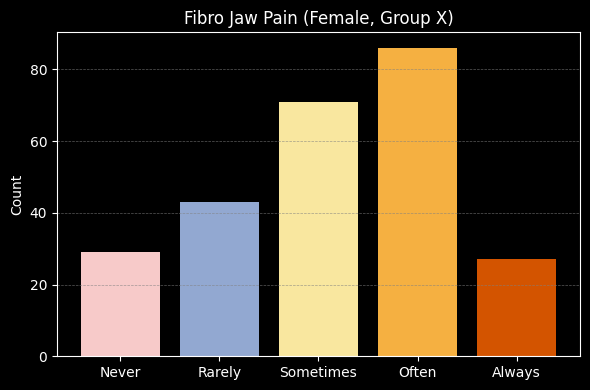

In [6]:
labels = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
colors = ['#f7cac9', '#92a8d1', '#f9e79f', '#f5b041', '#d35400']

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(labels, counts, color=colors)
ax.set_ylabel('Count')
ax.set_title('Fibro Jaw Pain (Female, Group X)')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
never_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 0) &
    (csi_responses['CSI20'] == 0)
]

rarely_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 0) &
    (csi_responses['CSI20'] == 1)
]

sometimes_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 0) &
    (csi_responses['CSI20'] == 2)
]

often_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 0) &
    (csi_responses['CSI20'] == 3)
]

always_pain = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 0) &
    (csi_responses['CSI20'] == 4)
]

all_fibro = csi_responses[
    (csi_responses['group'] == 1) &
    (csi_responses['sex'] == 0)
]

counts = [
    never_pain['ID'].count(),
    rarely_pain['ID'].count(),
    sometimes_pain['ID'].count(),
    often_pain['ID'].count(),
    always_pain['ID'].count()
]


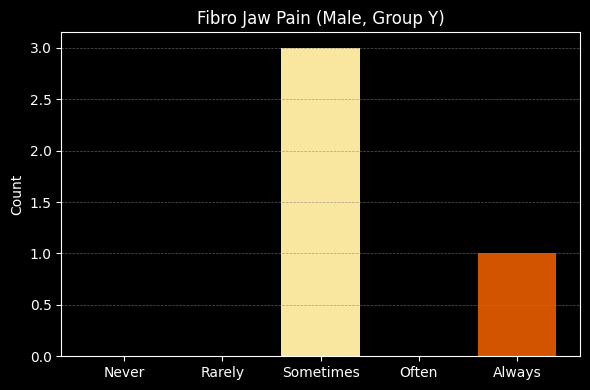

In [11]:
labels = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
colors = ['#f7cac9', '#92a8d1', '#f9e79f', '#f5b041', '#d35400']

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(labels, counts, color=colors)
ax.set_ylabel('Count')
ax.set_title('Fibro Jaw Pain (Male, Group Y)')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

Fields that include CSI and SQPQ represent answers to questions from the Central Sensitization Inventory (CSI) and Sensory Processing Sensitivity Questionnaire respectively.

In [7]:
categories = csi_keys.values.flatten().tolist()
categories

['Never', 'Rarely', 'Sometimes', 'Often', 'Always']

In [8]:
melted = csi_responses.melt(
    id_vars=csi_responses.columns.difference(questions),
    value_vars=questions,
    var_name="question",
    value_name="response"
)


NameError: name 'questions' is not defined